# The Effect of Savings in a Solow Model

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

## Introduction:
This study explores the Solow growth model, a foundational economic theory that analyzes the determinants of long-term economic growth. We extend the traditional model to include human capital, aiming to understand how the savings rate for human capital and physical capital interact to shape the economy. Through equations and interactive visualizations, we investigate the model's predictive capabilities.

## Imports and set magics:

In [1]:
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

#We import our the classes that is needed
from modelproject import Solow
model1 = Solow()
from modelproject import Solow_H
model2 = Solow_H()

# Basic Solow Model

We start by setting up equations 1-5 which represents a basic Solow model. 

**The equations for The Basic Solow Model**
$$Y_t=K^\alpha_t(A_tL_t)^{1-\alpha}, \quad 0<\alpha<1 \tag{1}$$
$$K_{t+1}=sY_t+(1-\delta)K_t, \quad 0<\delta<1 \tag{2}$$
$$S_t=sY_t, \quad 0<s<1 \tag{3}$$
$$L_{t+1}=(1+n)L_t \tag{4}$$
$$A_{t+1}=(1+g)A_t \tag{5}$$

Equation (1) specifies a Cobb-Douglas production function, describing the total production, $Y_t$, as a function of physical capital, $K_t$, $A_t$, the level of technology, and labor which is $L_t$. Equation (2) describes how physical capital evolve over time, where s denotes the savings rate for physical capital and $\delta$ is the depreciation rate. Equation (3) describes the share of the income which is saved/invested. Equations (4) and (5) indicate how the workforce and the level of technology grow over time. Definitions are used: $\tilde{k_t} = \frac{K_t}{A_tL_t}$. 

We compute the transition equation for physical capital by finding the per effective worker variable. We find the transition equation by substracting equation (1) into (2) and dividing it with equation (4) & (5)

$$
\tilde{k}_{t+1}= \frac{1}{(1+g) (1+n)}[s\tilde{k}_{t}^\alpha+(1-\delta)\tilde{k}_{t}]
$$

We are now able to find the steady state by saying $\tilde{k}_{t+1} = \tilde{k}_t = \tilde{k}$. We then isolate $\tilde{k}$. 

In [2]:
model1.ss_equation()

((delta + g*n + g + n)/s)**(1/(alpha - 1))

The steady state for capital per effective worker can be rewritten as:

$$
\tilde{k}^*= \frac{s}{\delta+gn+g+n}^\frac{1}{1-\alpha}
$$

We now seek to compute the exact steady state value. We do that by giving the parameters the following values:
$$
\alpha = 0.3
$$
$$
\delta = 0.05
$$
$$
s = 0.2
$$
$$
g = 0.01
$$
$$
n = 0.02
$$

We insert these values into our steady state equation and get the following value:

In [3]:
#Class Definition
class Solow:
    def __init__(self):
        # Setting up parameters and simulation values using dictionaries
        self.par = {'alpha': 0.3, 'n': 0.02, 'g': 0.01, 's': 0.2, 'delta': 0.05}
        self.num_periods = 99
        self.k_0 = 1e-7

    def ss_equation(self):
        par = self.par
        # Closed form solution derived from the steady state equation without sympy
        ss = ((par['s'] / (par['g'] + par['n'] + par['delta'])) ** (1 / (1 - par['alpha'])))
        return ss

#Instantiate the class and compute the steady state
solow_model = Solow()
steady_state_value = solow_model.ss_equation()

# Display the result
print(f"The steady state value of capital per effective worker is: {steady_state_value:.2f}")


The steady state value of capital per effective worker is: 3.70


This can visualized in a transition diagram. We see that the two graphs intersect each other at the value of 3.70 which is the same value as what we found before.

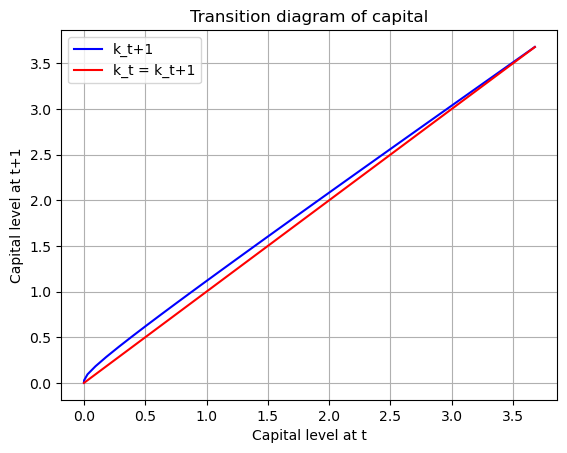

In [5]:
class SolowModel:
    def __init__(self, alpha=0.3, n=0.02, g=0.01, s=0.2, delta=0.05, k_0=1e-7, num_periods=99):
        self.alpha = alpha
        self.n = n
        self.g = g
        self.s = s
        self.delta = delta
        self.k_0 = k_0
        self.num_periods = num_periods

    def transition_diagram(self):
        k_t = self.k_0
        capital_values = [k_t]

        for _ in range(self.num_periods):
            k_t1 = ((1 - self.delta) * k_t + self.s * (k_t ** self.alpha)) / (1 + self.g + self.n)
            capital_values.append(k_t1)
            k_t = k_t1

        # Modify the plots to remove markers
        plt.plot(capital_values[:-1], capital_values[1:], 'b-', linewidth=1.5, label='k_t+1')
        plt.plot(capital_values[:-1], capital_values[:-1], 'r-', linewidth=1.5, label='k_t = k_t+1')
        plt.xlabel('Capital level at t')
        plt.ylabel('Capital level at t+1')
        plt.title('Transition diagram of capital')
        plt.legend()
        plt.grid(True)
        plt.show()

# Now instantiate the class and call the method
model1 = SolowModel()
model1.transition_diagram()


At the point where the two graphs intersect, the physical capital depreciates at the same rate as new savings/investments are made. This means that the level for physical capital per effective worker stays at the same level.

# Basic Solow Model with a change in savings

Now we want to explore how changes in savings/investment levels impact the evolution of the steady state. By adjusting the variable "s", we are able to explore savings effect on the economy's long-term stability and growth trajector for physical capital per effective worker.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider

class SolowModel:
    def __init__(self, alpha=0.3, n=0.02, g=0.01, s=0.2, delta=0.05, k_0=1e-7, num_periods=99):
        self.alpha = alpha
        self.n = n
        self.g = g
        self.s = s
        self.delta = delta
        self.k_0 = k_0
        self.num_periods = num_periods

    def set_savings_rate(self, s):
        self.s = s

    def transition_diagram(self):
        k_t = self.k_0
        capital_values = [k_t]

        for _ in range(self.num_periods):
            k_t1 = ((1 - self.delta) * k_t + self.s * (k_t ** self.alpha)) / (1 + self.g + self.n)
            capital_values.append(k_t1)
            k_t = k_t1

        plt.figure(figsize=(10, 6))
        plt.plot(capital_values[:-1], capital_values[1:], 'b-', linewidth=1.5, label='k_t+1')
        plt.plot(capital_values[:-1], capital_values[:-1], 'r-', linewidth=1.5, label='k_t = k_t+1')
        plt.xlabel('Capital level at t')
        plt.ylabel('Capital level at t+1')
        plt.title('Transition diagram of capital')
        plt.legend()
        plt.grid(True)
        plt.show()

# Create an instance of the model
model1 = SolowModel()

# Function to update the diagram interactively
def update_transition_diagram(s):
    model1.set_savings_rate(s)
    model1.transition_diagram()

# Create interactive controls
s_slider = FloatSlider(min=0.01, max=0.5, step=0.01, value=0.2, description='s', continuous_update=False)
interact(update_transition_diagram, s=s_slider)


interactive(children=(FloatSlider(value=0.2, continuous_update=False, description='s', max=0.5, min=0.01, step…

<function __main__.update_transition_diagram(s)>

As savings increase, we observe a rise in the level of physical capital per effective worker in steady state. This can be understood as when savings increases it leads to higher levels of investment, which contributes to the accumulation of physical capital in the economy. With more capital available per worker, productivity tends to increase, as workers have access to better tools and equipment, leading to higher output per worker. This relationship underscores the importance of savings and investment in the economy.

## Extended Solow with human capital

We now extend our solow model with the addition of human capital. This means we get 3 new equations (6), (7) & (8). Human capital should be understood as knowledge and skills. 

$$L_{t+1}=(1+n)L_t \tag{4}$$
$$A_{t+1}=(1+g)A_t \tag{5}$$
$$Y_t=K^\alpha_t(A_tL_t)^{1-\alpha}H^\phi, \quad 0<\alpha<1, \quad 0<\phi<1 \tag{6}$$
$$K_{t+1}=s_KY_t+(1-\delta)K_t, \quad 0<\delta<1 \tag{7}$$
$$H_{t+1}=s_HY_t+(1-\delta)H_t \tag{8}$$

Equation (6) specifies again a Cobb-Douglas production function, describing the total production, $Y_t$, as a function of physical capital, the level of technology, and labor, but now we also add human capital. Equation (7) is almost identical to equation (2) the only difference is that there is a savings rate for physical capital. Equation (8) describes how human capital evolve over time, where $s_H$ denotes the savings rate for human capital and $\delta$ is the depreciation rate of human capital.

We are now able to compute the trasition equations for the human capital and physical capital as per effective worker. We do this by firstly dividing equation (6) with (4) & (5). We also divide equation (7) & (8) with (4) & (5). We then substitute the newly found $\tilde{y}$ into the equations for human and physical capital as per effective worker. We then get these transition equations:

$$ 
\tilde{h}_{t+1} = \frac{1}{(1+g) (1+n)} \left((1-\delta) \tilde{h_{t}} + s_{H} \tilde{h_{t}}^{\phi} \tilde{k_{t}}^{\alpha} \right)
$$
$$
\tilde{k}_{t+1} = \frac{1}{(1+g) (1+n)} \left((1-\delta) \tilde{k_{t}} +  s_{K} \tilde{h_{t}}^{\phi} \tilde{k_{t}}^{\alpha}\right)
$$


We set up our parameters

In [7]:
# The parameters from last time (are also in our .py file)
delta = sm.symbols('delta')
k = sm.symbols('k')
alpha = sm.symbols('alpha')
phi = sm.symbols('phi')
g = sm.symbols('g')
h = sm.symbols('h')
n = sm.symbols('n')
#savings
s_K = sm.symbols('s_K')
s_H = sm.symbols('s_H')


We can now compute the nullclines for human and physical capital per effective worker. We set physical and human capital at a constant level. The nullclines look like this:

For Physical capital:
$$
\Delta \tilde{k}=0
$$ 
$$
\Updownarrow 
$$
$$
\tilde{h}=\left(\frac{{\delta + gn + g + n}}{{s_K}}\right)^{\frac{1}{{\phi}}} \tilde{k}_t^{\frac{{1 - \alpha}}{{\phi}}}
$$
For Human capital:
$$ \Delta \tilde{h} =0
$$
$$
\Updownarrow 
$$
$$
 \tilde{h}=\left(\frac{{s_H}}{{\delta + gn + g + n}}\right)^{\frac{1}{{1 - \phi}}} \tilde{k}_t^{\frac{{\alpha}}{{1 - \phi}}}
$$


We now find the steady states for human capital and physical capital.

In [8]:
model2.ss_value_h(k,h,alpha,delta,s_K,s_H,g,n,phi)

((delta + g*n + g + n)/(s_H*(((delta + g*n + g + n)/(h**phi*s_K))**(1/(alpha - 1)))**alpha))**(1/(phi - 1))

In [9]:
model2.ss_value_k(k,h,alpha,delta,s_K,s_H,g,n,phi)

((delta + g*n + g + n)/(s_K*(((delta + g*n + g + n)/(k**alpha*s_H))**(1/(phi - 1)))**phi))**(1/(alpha - 1))

The two expressions can be rewritten like this:

$$
\tilde{h}^* = \left( \frac {s_H^{1-\alpha} s_K ^\alpha } { \delta + gn + g + n } \right) ^\frac{1}{1- \alpha - \phi}
$$
$$
\tilde{k}^* = \left( \frac {s_H^\phi s_K ^{1-\phi} } { \delta + gn + g + n } \right) ^\frac{1}{1 - \alpha - \phi}
$$

The equations have effects on each other this is also called "Cross-effects" and "reinforcing effects"

We now find the steady state values by inserting the same values for the parameters as earlier.

In [9]:
# We have the 2 ss as:
tildeh = ((s_H**(1 - alpha)*s_K**(alpha))/(delta + g*n + g  + n))**(1/(1 - alpha - phi))
tildek = ((s_H**phi * s_K**(1 - phi))/(delta + g*n + g  + n))**(1/(1 - alpha - phi)) 

# We use lambdify to find steady state
hsteadysstate_function = sm.lambdify((alpha, phi, delta, n, g, s_K, s_H),tildeh) 
ksteadysstate_function = sm.lambdify((alpha, phi, delta, n, g, s_K, s_H),tildek)

print(f'SS-value for h: {hsteadysstate_function(0.3,0.3,0.05,0.02,0.01,0.2,0.15):4f} and SS-value for k:  {ksteadysstate_function(0.3,0.3,0.05,0.02,0.01,0.2,0.15):4f}')


SS-value for h: 5.936033 and SS-value for k:  7.914710


The figure below illustrate a phase diagram with the 2 nullclines we found. It is seen that the two graphs intersects when human capital is equal to 5.94 and physical capital is equal to 7.91. This was also what we found the steady states to be.



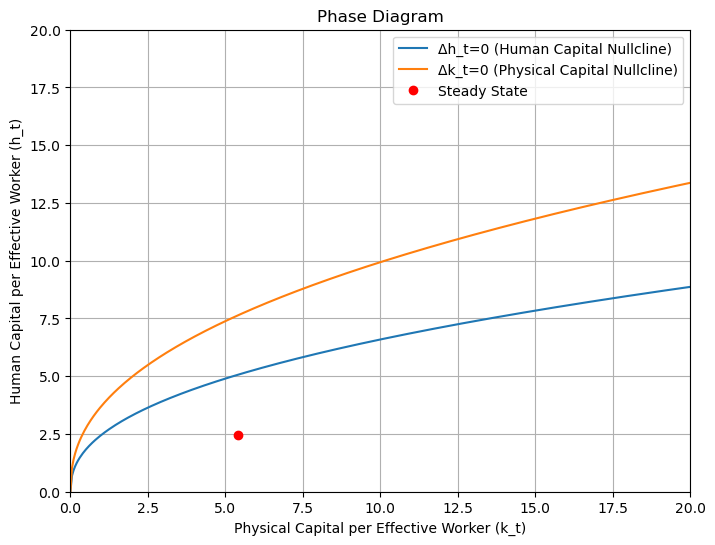

In [10]:
model2.NClines()

We now make the graphs interactive to show which effect changes in the savings rate for physical and human capital have on the steady state values for these capital values.

In [11]:
model2.interactive_NClines()

interactive(children=(FloatSlider(value=0.2, description='s_K', max=1.0, min=0.01, step=0.01), FloatSlider(val…

We find that when the savings rate for each type of capital rises, the steady state for that type of capital also rises. This makes sense intuitively, since higher savings rates is equal to a higher investment in that type of capital.

# Conclusion

In this study, we explored the dynamic properties of the Solow model, both in its basic form and extended to include human capital. By deriving and solving the equations governing the evolution of physical and human capital per effective worker, we were able to identify and compute the steady state values under various parameter settings. The use of interactive phase diagrams has proven valuable in visualizing how changes in the savings rates impact the long-term equilibrium of the model. These findings not only underscore the robustness of the Solow model in economic growth theory but also highlight its adaptability to complex scenarios involving multiple types of capital.